In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)

try:
    df = pd.read_csv('breast-cancer.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please ensure 'breast-cancer.csv' is in the working directory.")

if 'df' in locals():
    print("First five rows of the dataset:")
    print(df.head())
    print("\nDataset summary:")
    print(df.info())
    print("\nStatistical summary of numerical columns:")
    print(df.describe())
else:
     X_train, X_test, y_train, y_test = None, None, None, None # Placeholder assignment


Data loaded successfully.
First five rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   .

In [4]:
cols_to_drop = ['id', 'Unnamed: 32']
df = df.drop(columns=cols_to_drop, errors='ignore')

# Mapping categorical values to numerical
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 3. Seperate features (X) and target variable (y)
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values
print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (569, 30)
Target shape: (569,)


In [5]:
# 4. Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)


Training features shape: (455, 30)
Testing features shape: (114, 30)


In [6]:
# 4. Split the dataset into training and testing sets (custom function)
def custom_train_test_split(X,y, test_size=0.2, seed=42):
    """
    Docstring for custom_train_test_split
    
    :param X: Description
    :param y: Description
    :param test_size: Description
    :param seed: Description
    """
    n_samples = X.shape[0]
    n_test = int(n_samples * test_size)
    print(f"Number of test samples: {n_test}")

    # Shuffle indices
    np.random.seed(seed)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    print(f"Shuffled indices: {indices}")

    # Split indices
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    print(f"Train indices: {train_indices}")
    print(f"Test indices: {test_indices}")

    # Apply indices to data
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    print("Training features shape (custom):", X_train.shape)
    print("Testing features shape (custom):", X_test.shape)
    print("Training target shape (custom):", y_train.shape)
    print("Testing target shape (custom):", y_test.shape)

    # Return the split data
    return X_train, X_test, y_train, y_test

X_train_cust, X_test_cust, y_train_cust, y_test_cust = custom_train_test_split(X, y, test_size=0.2, seed=42)

print(f"\nDimensions after custom split (80/20):")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Number of test samples: 113
Shuffled indices: [204  70 131 431 540 567 369  29  81 477 457 167 165 329 527  83 511 556
 101 535  73 394 393 425 305  76 384 555 362  72 551 158 424 532 222  55
  10 281   6  90 104 353 422 211 275 109 520 557 531 284 264  30 208 528
 145 464 320  82  39 271  79   2 564 462 334 228 118  78 188 331 196  11
 395 177 538 482 235 255 144 380 132 333  86 250 274 257   9 468 382 322
  84 526 500 561 332 110 565 203 153 441 182 140  77 408 549 530 163 503
 148 486  75 249 238 265  68 181  63 248  60  15 290 137 155 517  88 449
 117 470 364  33   0 562 298 310 209  22 396 245  89 199 411  18 390 287
 512 402 446 210 184 442  54 404  46  93 231 108 244 568 434 428 192 341
 185 355 414 426  69 542 176 501 247 149 124 421 195 545 261 227 399 453
 523 410 114 141 498   7 541  19 172 407  56 497 301 550 289 277  49 234
  25 398 311 539  42 374 280 218 304 346 154 126 547 553 507 174  31 113
 325 173 381 319  57 495  24  17 268  66 272 494 296 490 519 513 473 480
 536 

In [ ]:
######################################################################
# VERBOSE MODE BE CAREFUL WITH PRINT STATEMENTS IN LARGE DATASETS
######################################################################

import matplotlib.pyplot as plt
# --- KNN Implementation ---

def euclidean_distance(x1, x2):
    print(f"Calculating Euclidean distance between {x1} and {x2}")
    print(f"np.sqrt(np.sum((x1 - x2) ** 2)): {np.sqrt(np.sum((x1 - x2) ** 2))}")
    return np.sqrt(np.sum((x1 - x2) ** 2))

def get_neighbors(X_train, y_train, x_test_row, k):
    distances = []

    # Calculate distance to every training sample
    for i in range(len(X_train)):
        dist = euclidean_distance(x_test_row, X_train[i])
        distances.append((dist, y_train[i])) # Store distance and label
    
    distances.sort(key=lambda x: x[0]) # Sort by distance
    print(f"Sorted distances (first 5): {distances[:5]}")
    neighbors_labels = [item[1] for item in distances[:k]] # Get labels of k nearest neighbors
    print(f"Neighbors' labels: {neighbors_labels}")
    return neighbors_labels

def predict_classification(neighbors_labels):
    counts = np.bincount(neighbors_labels)
    print(f"Neighbor labels: {neighbors_labels}, Counts: {counts}")
    return np.argmax(counts)

def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for x_test_row in X_test:
        neighbors = get_neighbors(X_train, y_train, x_test_row, k)
        result = predict_classification(neighbors)
        predictions.append(result)
    print(f"Predictions: {predictions}")
    return np.array(predictions)

def accuracy_score(y_true, y_pred):
    print(f"Calculating accuracy score between {y_true} and {y_pred}")
    print(f"{np.sum(y_true == y_pred) / len(y_true)}")
    return np.sum(y_true == y_pred) / len(y_true)


# --- Cross-validation & Grid Search ---

def custom_k_fold_split(X, y, n_splits=5, seed=42):
    np.random.seed(seed)
    n_samples = X.shape[0]
    indicies = np.arange(n_samples)
    np.random.shuffle(indicies)

    fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=int)
    fold_sizes[:n_samples % n_splits] += 1
    print(f"Fold sizes: {fold_sizes}")

    current = 0
    folds = []
    for fold_size in fold_sizes:
        folds.append(indicies[current:current + fold_size])
        current += fold_size
        print(f"Current index: {current}")
    
    print(f"Folds: {folds}")
    return folds

def custom_grid_search_cv(X, y, k_range, n_splits=5):
    folds = custom_k_fold_split(X, y, n_splits=n_splits)
    mean_scores = {}

    for k in k_range:
        fold_accuracies = []
        for i in range(n_splits):
            test_incidices = folds[i]
            train_incidices = np.hstack([folds[j] for j in range(n_splits) if j != i])

            X_train_fold, y_train_fold = X[train_incidices], y[train_incidices]
            X_test_fold, y_test_fold = X[test_incidices], y[test_incidices]
            print(f"Fold {i+1}, K={k}: Train shape: {X_train_fold.shape}, Test shape: {X_test_fold.shape}")
            print(f"y_train_fold: {y_train_fold}, y_test_fold: {y_test_fold}")

            y_pred_val = knn_predict(X_train_fold, y_train_fold, X_test_fold, k)
            accuracy = accuracy_score(y_test_fold, y_pred_val)
            fold_accuracies.append(accuracy)
            print(f"Fold {i+1}, K={k}: Accuracy: {accuracy}")
        
        mean_scores[k] = np.mean(fold_accuracies)
        print(f"K={k}: Mean accuracy over folds: {mean_scores[k]}")
        print(f"Mean accuracy for K={k}: {mean_scores[k]:.4f}")

    best_k = max(mean_scores, key=mean_scores.get)
    print(f"Best K found: {best_k} with accuracy: {mean_scores[best_k]:.4f}")
    best_score = mean_scores[best_k]
    return best_k, best_score, mean_scores

In [7]:
import matplotlib.pyplot as plt

# --- Custom KNN Core Functions ---

def euclidean_distance(x1, x2):
    """Calculates the Euclidean distance between two vectors."""
    # Ensure inputs are numpy arrays for element-wise operation
    return np.sqrt(np.sum((x1 - x2)**2))

def get_neighbors(X_train, y_train, x_test_row, k):
    """Finds the k nearest neighbors for a single test sample."""
    distances = []
    
    # Calculate distance to every training sample
    for i in range(len(X_train)):
        dist = euclidean_distance(x_test_row, X_train[i])
        distances.append((dist, y_train[i])) # Store distance and corresponding label

    # Sort by distance (first element of the tuple)
    distances.sort(key=lambda x: x[0])
    
    # Extract the labels of the k closest neighbors
    neighbors_labels = [item[1] for item in distances[:k]]
    return neighbors_labels

def predict_classification(neighbors_labels):
    """Determines the class label by majority vote."""
    # Count occurrences of each label (0 and 1)
    # Using np.bincount is efficient for integer arrays
    counts = np.bincount(neighbors_labels)
    # Return the index of the maximum count (which is the winning class label)
    return np.argmax(counts)

def knn_predict(X_train, y_train, X_test, k):
    """Predicts labels for an entire test set."""
    predictions = []
    for x_test_row in X_test:
        neighbors = get_neighbors(X_train, y_train, x_test_row, k)
        result = predict_classification(neighbors)
        predictions.append(result)
    return np.array(predictions)

def accuracy_score(y_true, y_pred):
    """Calculates the classification accuracy."""
    return np.sum(y_true == y_pred) / len(y_true)

# --- Custom Cross-Validation and Grid Search ---

def custom_k_fold_split(X, y, n_splits=5, seed=42):
    """Custom K-Fold split function."""
    np.random.seed(seed)
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=int)
    fold_sizes[:n_samples % n_splits] += 1
    
    current = 0
    folds = []
    for fold_size in fold_sizes:
        folds.append(indices[current:current + fold_size])
        current += fold_size
    return folds

def custom_grid_search_cv(X, y, k_range, n_splits=5):
    """Custom Grid Search with K-Fold Cross-Validation."""
    folds = custom_k_fold_split(X, y, n_splits)
    mean_scores = {}
    
    for k in k_range:
        fold_accuracies = []
        
        # Iterate over folds
        for i in range(n_splits):
            # i-th fold is the validation set (test_indices), the rest is training (train_indices)
            test_indices = folds[i]
            train_indices = np.concatenate([folds[j] for j in range(n_splits) if j != i])
            
            X_train_fold, y_train_fold = X[train_indices], y[train_indices]
            X_val_fold, y_val_fold = X[test_indices], y[test_indices]
            
            # 1. Predict labels using the custom KNN
            y_pred_val = knn_predict(X_train_fold, y_train_fold, X_val_fold, k)
            
            # 2. Calculate and store accuracy
            accuracy = accuracy_score(y_val_fold, y_pred_val)
            fold_accuracies.append(accuracy)
        
        # Calculate the mean accuracy across all folds for the current K
        mean_scores[k] = np.mean(fold_accuracies)
        print(f"Mean accuracy for k={k}: {mean_scores[k]:.4f}")

    # Find the optimal K
    best_k = max(mean_scores, key=mean_scores.get)
    best_score = mean_scores[best_k]
    
    return best_k, best_score, mean_scores



--- Performing Custom Grid Search with Cross-Validation on Unscaled Data ---
Starting custom Grid Search (5-Fold CV) for K on UN-SCALED training data...
Mean accuracy for k=1: 0.9187
Mean accuracy for k=2: 0.9165
Mean accuracy for k=3: 0.9187
Mean accuracy for k=4: 0.9165
Mean accuracy for k=5: 0.9165
Mean accuracy for k=6: 0.9121
Mean accuracy for k=7: 0.9165
Mean accuracy for k=8: 0.9099
Mean accuracy for k=9: 0.9121
Mean accuracy for k=10: 0.9165
Mean accuracy for k=11: 0.9143
Mean accuracy for k=12: 0.9165
Mean accuracy for k=13: 0.9143
Mean accuracy for k=14: 0.9143
Mean accuracy for k=15: 0.9165
Mean accuracy for k=16: 0.9143
Best K (Unscaled): 1, Best CV Accuracy (Unscaled): 0.9187

--- Results for Unscaled Data ---
Optimal K: 1
Best CV Accuracy Score: 0.9187


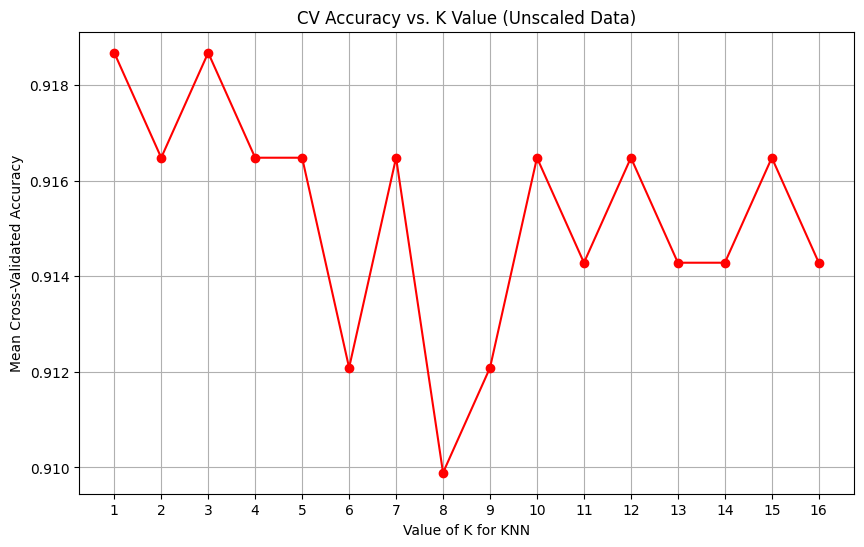

In [8]:
k_range = range(1, 17)

print("\n--- Performing Custom Grid Search with Cross-Validation on Unscaled Data ---")
print("Starting custom Grid Search (5-Fold CV) for K on UN-SCALED training data...")

best_k_unscaled, best_score_unscaled, mean_scores_unscaled = custom_grid_search_cv(
    X_train, y_train, k_range, n_splits=5
)

print(f"Best K (Unscaled): {best_k_unscaled}, Best CV Accuracy (Unscaled): {best_score_unscaled:.4f}")

print(f"\n--- Results for Unscaled Data ---")
print(f"Optimal K: {best_k_unscaled}")
print(f"Best CV Accuracy Score: {best_score_unscaled:.4f}")

# --- Plotting the CV scores vs K ---
k_values = list(mean_scores_unscaled.keys())
scores = list(mean_scores_unscaled.values())

plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', linestyle='-', color='red')
plt.title('CV Accuracy vs. K Value (Unscaled Data)')
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Storing results for later comparison in Step 4
results_unscaled = {'K': best_k_unscaled, 'CV_Accuracy': best_score_unscaled}


--- Data Scaling Completed ---

First five rows of scaled training data:
[[-1.44075296 -0.43531947 -1.36208497 -1.1391179   0.78057331  0.71892128
   2.82313451 -0.11914956  1.09266219  2.45817261 -0.26380039 -0.01605246
  -0.47041357 -0.47476088  0.83836493  3.25102691  8.43893667  3.39198733
   2.62116574  2.06120787 -1.23286131 -0.47630949 -1.24792009 -0.97396758
   0.72289445  1.18673232  4.67282796  0.9320124   2.09724217  1.88645014]
 [ 1.97409619  1.73302577  2.09167167  1.85197292  1.319843    3.42627493
   2.01311199  2.66503199  2.1270036   1.55839569  0.80531919 -0.81268678
   0.75195659  0.87716951 -0.89605315  1.18122247  0.18362761  0.60059598
  -0.31771686  0.52963649  2.17331385  1.3112795   2.08161691  2.1374055
   0.76192793  3.26560084  1.92862053  2.6989469   1.89116053  2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 -1.10978518 -1.33264483 -0.30735463
  -0.36555756 -0.69650228  1.93033305  0.95437877  0.02752055  1.96305996
  -0.12095781 -0.35077918  0.57276579

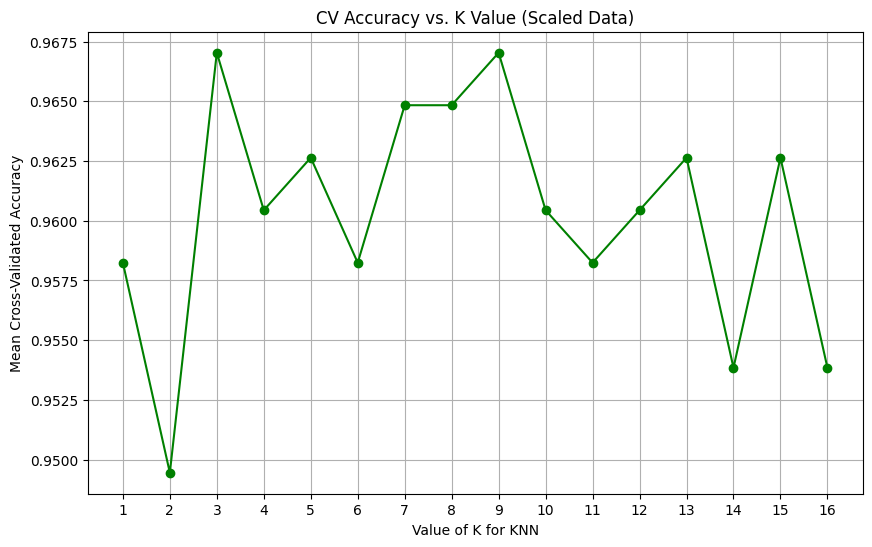

In [11]:
# --- Custome standard Scaler Implementation ---
class CustomStandardScaler:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        self.std_[self.std_ == 0] = 1  # Prevent division by zero
        return self

    def transform(self, X):
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    
scaler = CustomStandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\n--- Data Scaling Completed ---")
print("\nFirst five rows of scaled training data:")
print(X_train_scaled[:5])


print("Dimensions of scaled data:")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

k_range = list(range(1, 17))
print("\nStarting custom Grid Search (5-Fold CV) for K on SCALED training data...")
best_k_scaled, best_score_scaled, mean_scores_scaled = custom_grid_search_cv(
    X_train_scaled, y_train, k_range, n_splits=5
)


print(f"\n--- Results for SCALED Data ---")
print(f"Optimal K (Scaled Data): {best_k_scaled}")
print(f"Best CV Accuracy Score: {best_score_scaled:.4f}")

# --- Plotting the CV scores vs K ---
k_values_scaled = list(mean_scores_scaled.keys())
scores_scaled = list(mean_scores_scaled.values())

plt.figure(figsize=(10, 6))
plt.plot(k_values_scaled, scores_scaled, marker='o', linestyle='-', color='green')
plt.title('CV Accuracy vs. K Value (Scaled Data)')
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(k_values_scaled)
plt.grid(True)
plt.show()

# Storing results for later comparison
results_scaled = {'K': best_k_scaled, 'CV_Accuracy': best_score_scaled}



Feature Indices:
Mean Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
SE Indices: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Worst Indices: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Correlation Matrix for MEAN features (First 5x5 Sub-matrix):
[[1.   0.31 1.   0.99 0.17]
 [0.31 1.   0.31 0.3  0.01]
 [1.   0.31 1.   0.99 0.21]
 [0.99 0.3  0.99 1.   0.18]
 [0.17 0.01 0.21 0.18 1.  ]]

Correlation Matrix for WORST features (First 5x5 Sub-matrix):
[[1.   0.35 0.99 0.98 0.22]
 [0.35 1.   0.36 0.33 0.25]
 [0.99 0.36 1.   0.98 0.25]
 [0.98 0.33 0.98 1.   0.22]
 [0.22 0.25 0.25 0.22 1.  ]]

Number of selected features: 7
Shape of X_train_selected: (455, 7)
Shape of X_test_selected: (114, 7)

--- Data Scaling on Selected Features Completed ---

First five rows of scaled selected training data:
[[-1.44075296 -0.43531947  0.78057331 -0.11914956 -0.26380039 -1.23286131
   0.9320124 ]
 [ 1.97409619  1.73302577  1.319843    2.66503199  0.80531919  2.17331385
   2.6989469 ]
 [-1.39998202 -1.24962228 -1.33264483

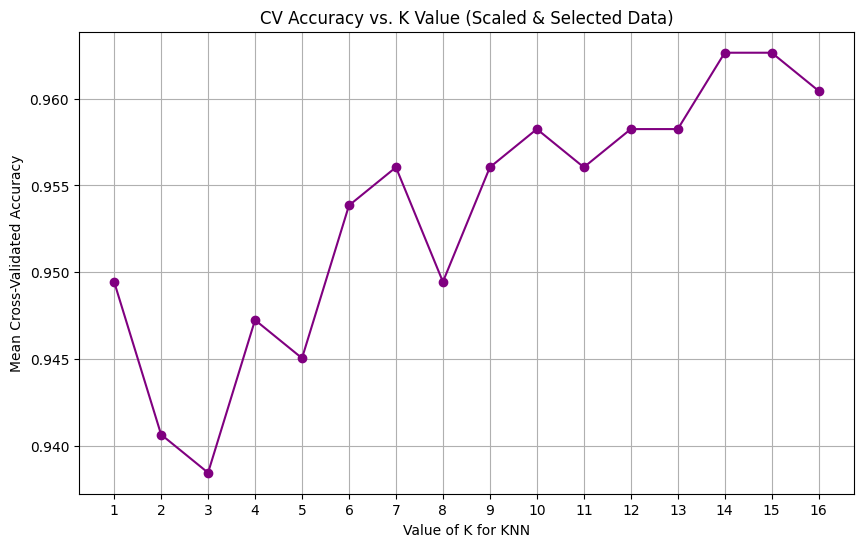

In [12]:
# --- 1. Custom Correlation ---
def custom_corr_matrix(X_data):
    n_features = X_data.shape[1]
    corr_matrix = np.zeros((n_features, n_features))

    for i in range(n_features):
        for j in range(n_features):
            col_i = X_data[:, i]
            col_j = X_data[:, j]

            mean_i = np.mean(col_i)
            mean_j = np.mean(col_j)
            std_i = np.std(col_i)
            std_j = np.std(col_j)

            covariance = np.mean((col_i - mean_i) * (col_j - mean_j))

            if std_i * std_j == 0:
                rho = 0.0
            else:
                rho = covariance / (std_i * std_j)

            corr_matrix[i, j] = rho
            corr_matrix[j, i] = rho  # Symmetric matrix

    return corr_matrix

# --- 2. Feature Grouping and Selection ---
mean_indices = list(range(10))
se_indices = list(range(10, 20))
worst_indices = list(range(20, 30))
print("\nFeature Indices:")
print(f"Mean Indices: {mean_indices}")
print(f"SE Indices: {se_indices}")
print(f"Worst Indices: {worst_indices}")

X_train_mean = X_train[:, mean_indices]
X_train_se = X_train[:, se_indices]
X_train_worst = X_train[:, worst_indices]

corr_mean = custom_corr_matrix(X_train_mean)
corr_worst = custom_corr_matrix(X_train_worst)

print("Correlation Matrix for MEAN features (First 5x5 Sub-matrix):")
print(corr_mean[:5, :5].round(2))

print("\nCorrelation Matrix for WORST features (First 5x5 Sub-matrix):")
print(corr_worst[:5, :5].round(2))

selected_indices_final = [0, 1, 4, 7, 10, 20, 27] 
print(f"\nNumber of selected features: {len(selected_indices_final)}")

# Create reduced datasets
X_train_selected = X_train[:, selected_indices_final]
X_test_selected = X_test[:, selected_indices_final]
print(f"Shape of X_train_selected: {X_train_selected.shape}")
print(f"Shape of X_test_selected: {X_test_selected.shape}")

# --- 3. Scaling and Grid Search on Selected Features ---

scaler_selected = CustomStandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)
print("\n--- Data Scaling on Selected Features Completed ---")
print("\nFirst five rows of scaled selected training data:")
print(X_train_selected_scaled[:5])

k_range = list(range(1, 17))

print("\nStarting custom Grid Search (5-Fold CV) for K on SCALED and SELECTED training data...")

best_k_selected_scaled, best_score_selected_scaled, mean_scores_selected_scaled = custom_grid_search_cv(
    X_train_selected_scaled, y_train, k_range, n_splits=5
)

print(f"\n--- Results for SCALED and SELECTED Data ---")
print(f"Optimal K: {best_k_selected_scaled}")
print(f"Best CV Accuracy Score: {best_score_selected_scaled:.4f}")

# --- Plotting the CV scores vs K ---
k_values_selected_scaled = list(mean_scores_selected_scaled.keys())
scores_selected_scaled = list(mean_scores_selected_scaled.values())

plt.figure(figsize=(10, 6))
plt.plot(k_values_selected_scaled, scores_selected_scaled, marker='o', linestyle='-', color='purple')
plt.title('CV Accuracy vs. K Value (Scaled & Selected Data)')
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(k_values_selected_scaled)
plt.grid(True)
plt.show()

# Storing results for final comparison
results_selected_scaled = {'K': best_k_selected_scaled, 'CV_Accuracy': best_score_selected_scaled}